In [2]:
import numpy as np
from scipy.optimize import minimize_scalar
from bernouilli_bandit import BernoulliBandit
import math
from matplotlib import pyplot as plt

In [3]:
def kl_bernoulli(p, q):
    def part(p1, q1):
        if p1 == 0:
            ans = 0
        elif q1 == 0:
            ans = np.inf
        else:
            ans = p1 * math.log(p1 / q1)
        return ans

    return part(p, q) + part(1 - p, 1 - q)


In [4]:
def ucb_opt(n, s, t, c):
    p = s / n

    def to_optimize(q):
        return np.power(np.log(t) + c * np.log(np.log(t + 1)) - n * kl_bernoulli(p, q), 2)

    q = minimize_scalar(to_optimize, bounds=(p, 1), method='bounded').x
    return q


In [5]:
def ucb_gaussian(n, s, t, c):
    return s / n + np.sqrt((1 / 2) * (np.log(t + 1) + c * np.log(np.log(t + 1))) / n)


In [6]:
def kl_ucb(bandit, T, ucb, c=3):
    K = bandit.get_K()
    n, s = np.zeros(K), np.zeros(K)

    def play(k_t):
        s[k_t] += bandit.play(k_t)
        n[k_t] += 1

    for t in range(0, K):
        k_t = t
        play(k_t)
    for t in range(K, T):
        ucb_t = [ucb(n[i], s[i], t, c) for i in range(0, k)]
        index = np.array([i for i in range(k)])
        index_max = (ucb_t == max(ucb_t))
        possible_ind = index[index_max]
        k_t = possible_ind[np.argmin(n[possible_ind])]
        play(k_t)


In [7]:
def kl_ucb_bernoulli(bandit, T, c=3):
    kl_ucb(bandit, T, ucb_opt)
    

In [8]:
def kl_ucb_gaussian(bandit, T, c=3):
    kl_ucb(bandit, T, ucb_gaussian)
    

In [13]:
N = 50
k = 2
T = 1000
c = 3

np.random.seed(50)
cumul_regret_bernoulli = []
cumul_regret_gaussian = []

for i in range(N):
    seed = np.random.randint(2000, size=1)

    bandit1 = BernoulliBandit(k, seed)
    kl_ucb_bernoulli(bandit1, T)
    cumul_regret_bernoulli.append(bandit1.get_cumul_regret())

    bandit2 = BernoulliBandit(k, seed)
    kl_ucb_gaussian(bandit2, T)
    cumul_regret_gaussian.append(bandit2.get_cumul_regret())

mean_cumul_regret_bernoulli = np.mean(cumul_regret_bernoulli, axis=0)
mean_cumul_regret_gaussian = np.mean(cumul_regret_gaussian, axis=0)


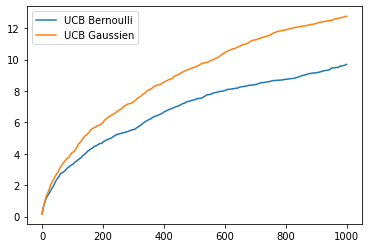

In [14]:
plt.plot(mean_cumul_regret_bernoulli, label = 'UCB Bernoulli')
plt.plot(mean_cumul_regret_gaussian, label = 'UCB Gaussien')
plt.legend()

In [26]:
N = 50
k = 2
T = 1000
c = 1

np.random.seed(50)
cumul_regret_bernoulli = []
cumul_regret_gaussian = []

for i in range(N):
    seed = np.random.randint(2000, size=1)

    bandit1 = BernoulliBandit(k, seed)
    kl_ucb_bernoulli(bandit1, T)
    cumul_regret_bernoulli.append(bandit1.get_cumul_regret())

    bandit2 = BernoulliBandit(k, seed)
    kl_ucb_gaussian(bandit2, T)
    cumul_regret_gaussian.append(bandit2.get_cumul_regret())

mean_cumul_regret_bernoulli = np.mean(cumul_regret_bernoulli, axis=0)
std_cumul_regret_bernoulli = np.std(cumul_regret_bernoulli, axis=0)
mean_cumul_regret_gaussian = np.mean(cumul_regret_gaussian, axis=0)
std_cumul_regret_gaussian = np.std(cumul_regret_gaussian, axis=0)

In [1]:
std_cumul_regret_gaussian = np.std(cumul_regret_gaussian, axis=0)
plt.plot(mean_cumul_regret_bernoulli, label = 'UCB Bernoulli')
plt.plot(mean_cumul_regret_gaussian, label = 'UCB Gaussien')
plt.fill_between(np.arange(T), mean_cumul_regret_bernoulli, mean_cumul_regret_bernoulli+std_cumul_regret_bernoulli, alpha=0.5)
plt.fill_between(np.arange(T), mean_cumul_regret_gaussian, mean_cumul_regret_gaussian+std_cumul_regret_gaussian, alpha=0.5)
plt.legend(loc='upper left')
plt.xlabel=('t')
plt.ylabel=('Pseudo-regret cumnulatif')
plt.savefig('rapport/figures/comparaison.pdf')

NameError: name 'np' is not defined

In [31]:
plt.savefig('rapport/figures/comparaison.pdf')

<Figure size 432x288 with 0 Axes>